### Reconstruction errors

This notebook reproduces the experiment quantifying the impact of 
depth and negative slope on the accuracy of both the layer-wise invertible and hybrid architecture.

In [1]:
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helpers import *
from rec_error_helpers import log_rec, summarize_errors, init_data
from models import IFlatXD, IResXD

/home/tristan/anaconda3/envs/torch4/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [2]:
device = 1
batch_size = 256

dataset = cifar10(root='./data/cifar10')
train_set = list(zip(transpose(normalise(pad(dataset['train']['data'], 4))), dataset['train']['labels']))
transforms = [Crop(32, 32), FlipLR(), Cutout(8, 8)]
train_batches = Batches(Transform(train_set, transforms), batch_size, shuffle=True, 
                        set_random_choices=True, drop_last=True, device=device)
batch  = next(iter(train_batches))

Files already downloaded and verified
Files already downloaded and verified


In [8]:
invert = True
skip_invert = True
invert = True
negative_slope = 0.2
ieps = 0.0001
nlayers=[2, 3, 3]
infeatures = 32
pools = ["channel", "channel"]

# Evolution errors with depth

[2, 1, 1]
[2, 2, 1]
[2, 2, 2]
[3, 2, 2]
[3, 3, 2]
[3, 3, 3]
[4, 3, 3]
[4, 4, 3]
[4, 4, 4]
[5, 4, 4]
[2, 1, 1]
[2, 2, 1]
[2, 2, 2]
[3, 2, 2]
[3, 3, 2]
[3, 3, 3]
[4, 3, 3]
[4, 4, 3]
[4, 4, 4]
[5, 4, 4]
[2, 1, 1]
[2, 2, 1]
[2, 2, 2]
[3, 2, 2]
[3, 3, 2]
[3, 3, 3]
[4, 3, 3]
[4, 4, 3]
[4, 4, 4]
[5, 4, 4]
[2, 1, 1]
[2, 2, 1]
[2, 2, 2]
[3, 2, 2]
[3, 3, 2]
[3, 3, 3]
[4, 3, 3]
[4, 4, 3]
[4, 4, 4]
[5, 4, 4]


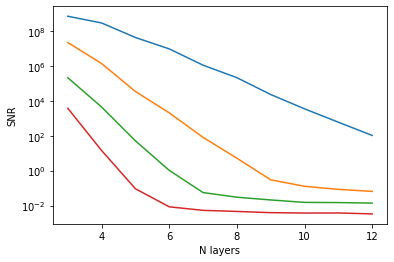

In [11]:
results = []

fig, ax = plt.subplots()
plt.yscale("log")
plt.ylabel("SNR")
plt.xlabel("N layers")

for negative_slope in [0.4, 0.2, 0.1, 0.05]:
    tmp = []
    nlayers=[1, 1, 1]

    for i in range(10):
        nlayers[i%len(nlayers)]+=1
        print(nlayers)

        model = IFlatXD(infeatures=infeatures, invert=invert, layers=nlayers, pools=pools,
                       negative_slope=negative_slope, bn_ieps=ieps, inchannels=3).cuda(device)

        handles, data=log_rec(model)
        inp = batch["input"].clone()
        target = batch["target"].clone()

        output = model(inp)
        output.sum().backward()

        df = summarize_errors(data)
        df=df.replace([np.inf, -np.inf], np.nan)
        init_data(data)

        tmp.append(df["snr"].min())

    ax.plot(list(range(3,13)), tmp)
    results.append(tmp)
    #plt.savefig("figures/Figure_11")

[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]
[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]
[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]
[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]


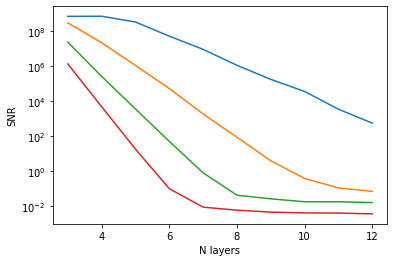

In [12]:
results_2 = []

fig, ax = plt.subplots()
plt.yscale("log")
plt.ylabel("SNR")
plt.xlabel("N layers")

for negative_slope in [0.4, 0.2, 0.1, 0.05]:
    tmp = []
    nlayers=[0, 1, 1]

    for i in range(10):
        nlayers[i%len(nlayers)]+=1
        print(nlayers)

        model = IFlatXD(infeatures=infeatures, invert=invert, layers=nlayers, pools=pools,
                       negative_slope=negative_slope, bn_ieps=ieps, inchannels=3).cuda(device)

        handles, data=log_rec(model)
        inp = batch["input"].clone()
        target = batch["target"].clone()

        output = model(inp)
        output.sum().backward()

        df = summarize_errors(data)
        df=df.replace([np.inf, -np.inf], np.nan)
        init_data(data)

        tmp.append(df["snr"].min())

    ax.plot(list(range(3,13)), tmp)
    results_2.append(tmp)
    #plt.savefig("figures/Figure_11")

In [26]:
#fig, ax = plt.subplots()
#plt.yscale("log")
#plt.ylabel("SNR")
#plt.xlabel("N layers")
#ax.plot(list(range(3,13)), tmp)

In [27]:
IResXD??

Init signature:
IResXD(
    w=0.125,
    infeatures=32,
    inchannels=3,
    pools=['depth', 'depth', 'depth'],
    nblock=2,
    nlayer=[1, 1, 1],
    nclass=10,
    invert=True,
    skip_invert=True,
    negative_slope=0.01,
    bn_ieps=0.1,
)
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
           x = F.relu(self.conv1(x))
           return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call `.cuda()`, etc.
Source:        
class

[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]
[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]
[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]
[1, 1, 1]
[1, 2, 1]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[2, 3, 3]
[3, 3, 3]
[3, 4, 3]
[3, 4, 4]
[4, 4, 4]


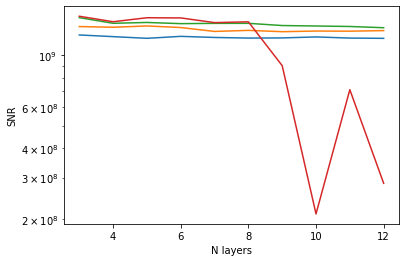

In [14]:
results_2 = []
nblock  = 1
negative_slopes = [0.4, 0.2, 0.1, 0.05]

for negative_slope in negative_slopes:
    tmp = []
    nlayers=[0, 1, 1]

    for i in range(10):
        nlayers[i%len(nlayers)]+=1
        print(nlayers)

        model   = IResXD(infeatures=infeatures, invert=invert, nlayer=nlayers, nblock=nblock, pools=pools,
                     skip_invert=invert, negative_slope=negative_slope, bn_ieps=ieps, inchannels=3).cuda(device)

        handles, data=log_rec(model)
        inp = batch["input"].clone()
        target = batch["target"].clone()

        output = model(inp)
        output.sum().backward()

        df = summarize_errors(data)
        df=df.replace([np.inf, -np.inf], np.nan)
        init_data(data)

        tmp.append(df["snr"].min())

    results_2.append(tmp)
    #plt.savefig("figures/Figure_11")

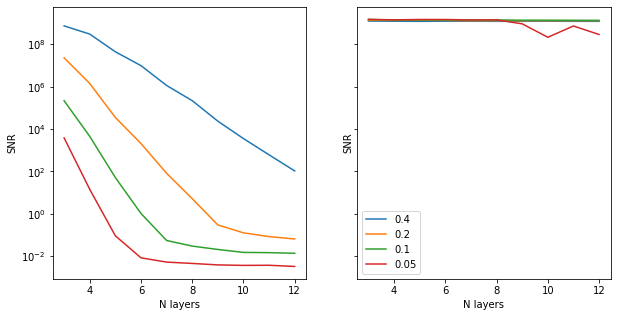

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
plt.yscale("log")

ax[0].set_ylabel("SNR")
ax[0].set_xlabel("N layers")

ax[1].set_ylabel("SNR")
ax[1].set_xlabel("N layers")

for i,slope in enumerate(negative_slopes):
    ax[0].plot(list(range(3,13)), results[i], label=slope)
    ax[1].plot(list(range(3,13)), results_2[i], label=slope)

plt.legend()

In [25]:
fig.savefig("figures/SNR_layers")

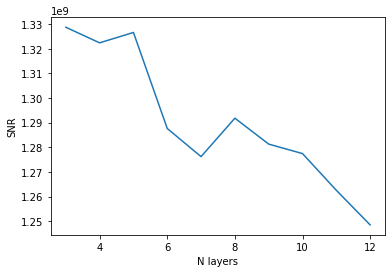

In [5]:
nblock  = 1
nlayers= [0,1,1]

res1 = []
res2 = []

for i in range(10):
    nlayers[i%len(nlayers)]+=1
    
    model   = IResXD(infeatures=infeatures, invert=invert, nlayer=nlayers, nblock=nblock, pools=pools,
                 skip_invert=invert, negative_slope=negative_slope, bn_ieps=ieps, inchannels=3).cuda(device)


    handles, data=log_rec(model)
    inp    = batch["input"].clone()
    target = batch["target"].clone()
    
    output = model(inp)
    output.sum().backward()
    
    df = summarize_errors(data)
    df=df.replace([np.inf, -np.inf], np.nan)
    init_data(data)
    res1.append(df["snr"].min())
    res2.append(df["snr"].mean())
    
plt.ylabel("SNR")
plt.xlabel("N layers")
plt.plot(list(range(3, 13)), res1)
plt.savefig("figures/Figure_14")

# Evolution error with slope

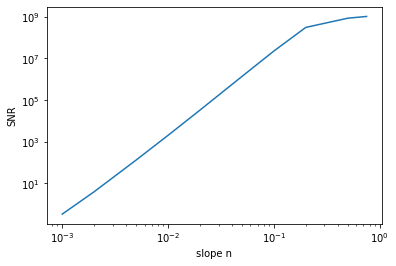

In [6]:
slopes = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.75]
nlayers=[1,1,1]
res1 = []
res2 = []

for negative_slope in slopes:
    
    model = IFlatXD(infeatures=infeatures, invert=invert, layers=nlayers, pools=pools,
                   negative_slope=negative_slope, bn_ieps=ieps, inchannels=3).cuda(device)
    handles, data=log_rec(model)
    
    inp    = batch["input"].clone()
    target = batch["target"].clone()
    
    output = model(inp)
    output.sum().backward()
    
    df = summarize_errors(data)
    df=df.replace([np.inf, -np.inf], np.nan)
    init_data(data)
    res1.append(df["snr"].min())
    res2.append(df["snr"].mean())
    
plt.ylabel("SNR")
plt.xlabel("slope n")
plt.yscale("log")
plt.xscale("log")
plt.plot(slopes, res1)
plt.savefig("figures/Figure_11_b")

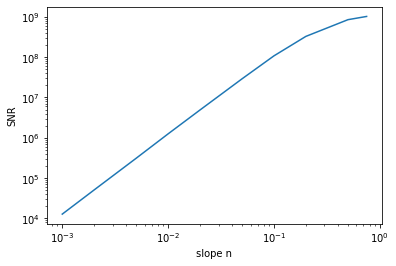

In [7]:
slopes  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.75]
nlayers = [1,1,1]
res1    = []
res2    = []
nblock = 2

for negative_slope in slopes:
    
    model   = IResXD(infeatures=infeatures, invert=invert, nlayer=nlayers, nblock=nblock, pools=pools,
                     skip_invert=invert, negative_slope=negative_slope, bn_ieps=ieps, inchannels=3).cuda(device)
    handles, data=log_rec(model)
    
    inp    = batch["input"].clone()
    target = batch["target"].clone()
    
    output = model(inp)
    output.sum().backward()
    
    df = summarize_errors(data)
    df=df.replace([np.inf, -np.inf], np.nan)
    init_data(data)
    res1.append(df["snr"].min())
    res2.append(df["snr"].mean())
    
plt.ylabel("SNR")
plt.xlabel("slope n")
plt.yscale("log")
plt.xscale("log")
plt.plot(slopes, res1)
plt.savefig("figures/Figure_14_b")